In [30]:
import os
import sys
sys.path.insert(1, os.path.dirname(os.getcwd())) #This allows importing files from parent folder
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pickle
from analysis_tools import get_power_spectrum, get_rms_voltage, gaussian_eval

In [85]:
filename = os.path.join('../in_progress','rapidfire3sec.pickle')
file = open(filename, 'rb')
raw_data = pickle.load(file)
file.close()
raw_data = np.array(raw_data)

In [142]:
VRANGE = 6144 #Full range scale in mV. Options: 256, 512, 1024, 2048, 4096, 6144.
sps = 250 # Samples per second to collect data. Options: 128, 250, 490, 920, 1600, 2400, 3300.
sinterval = 1.0/sps
sampletime = 0.5 # how long to look back in time for current alpha waves
exptime = 20 #total experiment time
time_series_len = int(sampletime*sps)
time_series = np.zeros(time_series_len)
raw_data_len = int(exptime*sps)
freq = np.fft.fftfreq(time_series.size, d=1/sps) #Gets frequencies in Hz/sec
freq_min = 8 #minimum freq in Hz for alpha waves
freq_max = 12 #maximum freq in Hz for alpha waves
times = np.linspace(0, exptime, num=exptime*sps)
rms_times = np.linspace(0,exptime-sampletime, num=(exptime-sampletime)*sps)

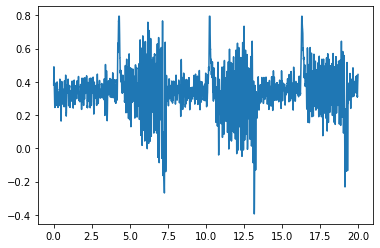

In [143]:
plt.plot(times,raw_data)

In [146]:
slices = []
for i in range(raw_data_len - time_series_len):
    slices.append(raw_data[i:i+time_series_len])
slices = np.array(slices)

In [147]:
rms_vals = []

for i in range(slices.shape[0]):
    ps = get_power_spectrum(slices[i])
    rms = get_rms_voltage(ps, freq_min, freq_max, freq, time_series_len)
    rms_vals.append(rms)
rms_vals = np.array(rms_vals)

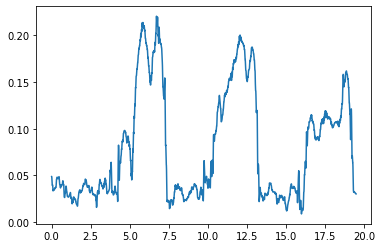

In [148]:
plt.plot(rms_times, rms_vals)

In [152]:
##### User inputs:
cutoff = 0.10
binarytime = 3 #how long to take communication of binary state
switchtime = 2 #must be less than binary time, ignores data for this time because might be switching
    
switch_points = np.arange(1,exptime,binarytime)
start_record = switch_points + switchtime/2
end_record = switch_points + binarytime - switchtime/2

interval_times = np.array([start_record, end_record]).T
print(interval_times)
interval_indices = interval_times*sps
interval_indices = interval_indices.astype(np.int32)

binary_data = []
for interval in interval_indices:
    if np.mean(rms_vals[interval[0]:interval[1]]) < cutoff:
        binary_data.append(0)
    else:
        binary_data.append(1)
        
print(binary_data)

[[ 2.  3.]
 [ 5.  6.]
 [ 8.  9.]
 [11. 12.]
 [14. 15.]
 [17. 18.]
 [20. 21.]]
[0, 1, 0, 1, 0, 1, 1]


In [160]:
alphabet = {
    'a': [1,1,0,0,0],
    'b': [1,0,0,0,0],
    'c': [0,0,0,1,0],
    'd': [0,0,1,0,0],
    'e': [1,1,1,1,1],
    'f': [0,1,1,1,1],
    'g': [1,1,1,1,0],
    'h': [1,0,0,0,1],
    'i': [1,1,1,0,0],
    'j': [0,0,1,0,1],
    'k': [0,0,1,1,0],
    'l': [0,1,0,0,0],
    'm': [0,1,0,0,1],
    'n': [0,1,1,1,0],
    'o': [0,0,1,1,1],
    'p': [0,1,0,1,1],
    'q': [0,1,0,1,0],
    'r': [0,1,1,0,0],
    's': [0,1,1,0,1],
    't': [1,0,0,1,0],
    'u': [0,0,0,1,1],
    'v': [1,0,0,1,1],
    'w': [1,0,1,1,1],
    'x': [1,0,1,0,1],
    'y': [0,0,0,0,1],
    'z': [1,0,1,0,0],
    ' ': [0,0,0,0,0]
}

In [163]:
num_letters = int(len(binary_data) / 5)
binary_letter = [1,0,0,0,1]

letter = list(alphabet.keys())[list(alphabet.values()).index(binary_letter)]
print(letter)

h
